In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv  # opencv
from sklearn import utils
from tqdm.notebook import tqdm  # progressbar 처리
import os  # file의 경로를 설정하기 위해 필요!

In [2]:
# img = 'cat.0.jpg'

# tmp = img.split('.')
# print(tmp)

In [3]:
# 폴더 경로 설정
train_dir = 'C:/jupyter_home/data/cat_dog/train'

# label(target)을 알아내기 위한 함수
# img는 파일이름 (cat.0.jpg)
# cat => 0, dog => 1
def labeling(img):
    class_name = img.split('.')[0]
    if class_name == 'cat':
        return 0
    if class_name == 'dog':
        return 1
    
# label data(t_data)와 pixel data(x_data)를 저장할 변수를 하나 만들어요!
x_data = []
t_data = []

In [4]:
# 파일을 하나씩 반복하면서 처리하면 될 거 같아요!
# 특정 폴더에 있는 모든 파일명을 알아야해요! => os.listdir()

for img in tqdm(os.listdir(train_dir),
                total=len(os.listdir(train_dir)),
                position=0,
                leave=True):
    
    label_data = labeling(img)  # 0 or 1
    
    img_path = os.path.join(train_dir,img)
    
    # img_path(이미지 full path)를 이용해서 opencv를 통해 픽셀데이터를 추출
    img_data = cv.resize(cv.imread(img_path, cv.IMREAD_GRAYSCALE), (80,80))
    
    t_data.append(label_data)  # [0,1,1,0,1]
    x_data.append(img_data.ravel())  # [[],[],[]]
    

  0%|          | 0/25000 [00:00<?, ?it/s]

In [5]:
t_df = pd.DataFrame({
                   'label' : t_data
})
display(t_df.head())

,label
0,0
1,0
2,0
3,0
4,0


In [6]:
x_df = pd.DataFrame(x_data)
display(x_df.head())

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,-87,-82,-76,-72,-68,-65,-60,-58,-55,-53,...,3,3,3,3,2,2,2,2,2,2
1,43,43,58,45,35,28,40,52,37,41,...,38,39,44,53,59,57,70,71,47,33
2,42,38,45,46,58,57,54,59,48,51,...,88,126,-100,-91,-119,-121,-107,-94,-85,-102
3,-36,-32,-31,-26,-33,-28,-26,-31,-28,-29,...,-20,-24,-28,-52,-52,-53,-40,-35,-44,-43
4,114,120,115,88,96,-117,127,-71,-126,-60,...,105,101,91,95,92,97,120,89,96,84


In [7]:
# x_data와 t_data를 결합
df = pd.merge(t_df, x_df, left_index=True, right_index=True)
display(df.head())

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,-87,-82,-76,-72,-68,-65,-60,-58,-55,...,3,3,3,3,2,2,2,2,2,2
1,0,43,43,58,45,35,28,40,52,37,...,38,39,44,53,59,57,70,71,47,33
2,0,42,38,45,46,58,57,54,59,48,...,88,126,-100,-91,-119,-121,-107,-94,-85,-102
3,0,-36,-32,-31,-26,-33,-28,-26,-31,-28,...,-20,-24,-28,-52,-52,-53,-40,-35,-44,-43
4,0,114,120,115,88,96,-117,127,-71,-126,...,105,101,91,95,92,97,120,89,96,84


In [8]:
# shuffle을 이용해서 dataframe의 row를 섞어줘요
shuffle_df = utils.shuffle(df)
display(shuffle_df.head())

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
24168,1,35,37,42,35,65,39,42,46,46,...,-16,-12,-4,-7,-10,-12,-10,-11,-21,-36
17744,1,51,50,50,50,47,49,47,51,53,...,-110,-114,-116,-110,-109,-94,-104,-108,-101,-109
4271,0,116,92,121,112,124,117,-116,-118,-111,...,-41,-35,-25,-32,-33,-36,-35,-34,-34,-31
436,0,38,38,38,37,38,38,37,28,24,...,-86,-82,-86,-80,-72,-73,-74,-75,-64,-63
6633,0,46,41,43,46,47,46,44,49,68,...,107,107,113,93,94,97,96,98,103,99


In [9]:
# 최종적으로 만들어진 dataframe을 파일로 저장
shuffle_df.to_csv('C:/jupyter_home/data/cat_dog/train.csv', index=False)

In [10]:
import os, shutil

original_dataset_dir = './data/cat_dog/train'

base_dir = 'data/cat_dog_full'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train').replace('\\','/')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation').replace('\\','/')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test').replace('\\','/')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir,'cats').replace('\\','/')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs').replace('\\','/')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats').replace('\\','/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs').replace('\\','/')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats').replace('\\','/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs').replace('\\','/')
os.mkdir(test_dogs_dir)

## file 복사 ##
## 고양이와 멍멍이가 각각 12,500개
## train : 7,000 
## validation : 3,000
## test : 2,500 

fnames = ['cat.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)


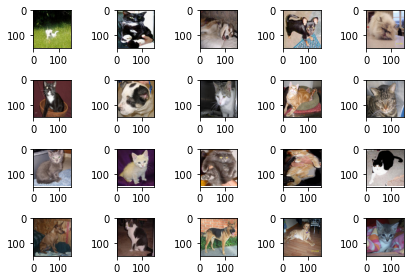

In [10]:
# Keras가 제공하는 ImageDataGenerator 사용에 대해서 알아보아요!

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './data/cat_dog_full/train'    # cats folder, dogs folder
valid_dir = './data/cat_dog_full/validation'

# ImageDataGenerator를 생성해요!
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

for x_data, t_data in train_generator:
    print(x_data.shape)
    print(t_data.shape)
    break
    
figure = plt.figure()
ax = []

for i in range(20):
    ax.append(figure.add_subplot(4,5,i+1))

    
for x_data, t_data in train_generator:
    print(x_data.shape)   # (20, 150, 150, 3)
    print(t_data.shape)
    
    for idx, img_data in enumerate(x_data):
        ax[idx].imshow(img_data)
        
    break
    
plt.tight_layout()
plt.show()